In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [ ]:
df = pd.read_csv('../assets/synthetic_fraud_dataset.csv')

### Basic info

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [8]:
df.isna().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [9]:
print(df.describe())

       Transaction_Amount  Account_Balance  IP_Address_Flag  \
count        50000.000000     50000.000000      50000.00000   
mean            99.411012     50294.065981          0.05020   
std             98.687292     28760.458557          0.21836   
min              0.000000       500.480000          0.00000   
25%             28.677500     25355.995000          0.00000   
50%             69.660000     50384.430000          0.00000   
75%            138.852500     75115.135000          0.00000   
max           1174.140000     99998.310000          1.00000   

       Previous_Fraudulent_Activity  Daily_Transaction_Count  \
count                  50000.000000             50000.000000   
mean                       0.098400                 7.485240   
std                        0.297858                 4.039637   
min                        0.000000                 1.000000   
25%                        0.000000                 4.000000   
50%                        0.000000             

### Understanding the data through visualization of graphs

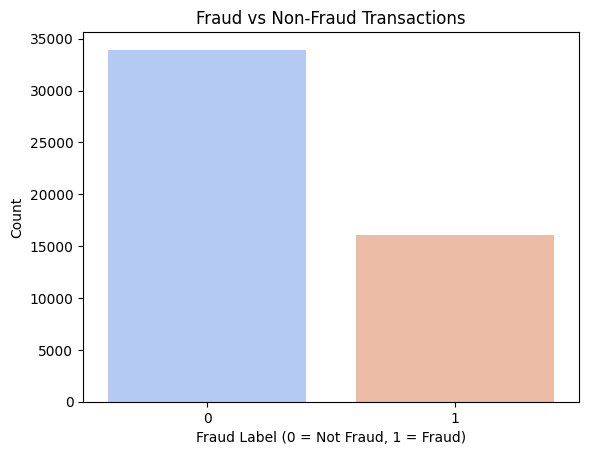

In [10]:
sns.countplot(x=df['Fraud_Label'], palette='coolwarm')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraud Label (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

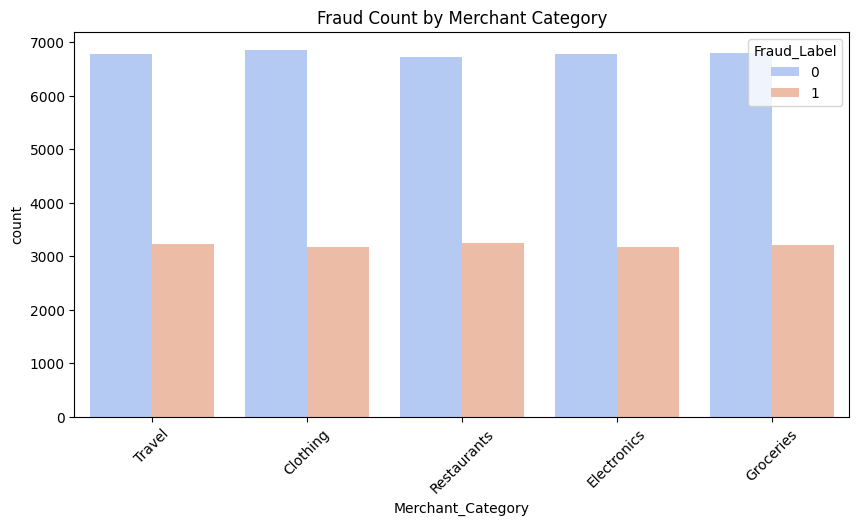

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='Merchant_Category', hue='Fraud_Label', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Fraud Count by Merchant Category")
plt.show()

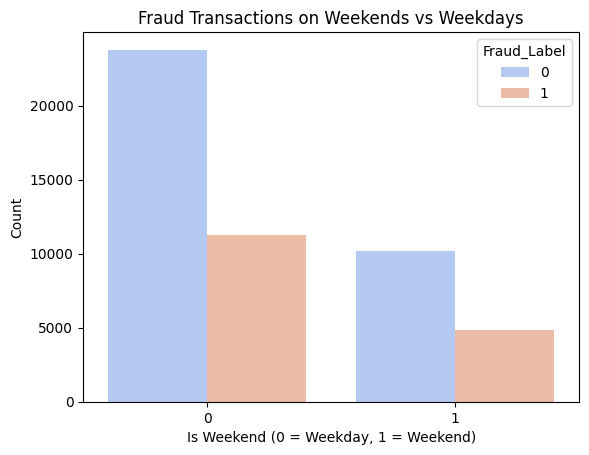

In [12]:
sns.countplot(x=df['Is_Weekend'], hue=df['Fraud_Label'], palette='coolwarm')
plt.title("Fraud Transactions on Weekends vs Weekdays")
plt.xlabel("Is Weekend (0 = Weekday, 1 = Weekend)")
plt.ylabel("Count")
plt.show()

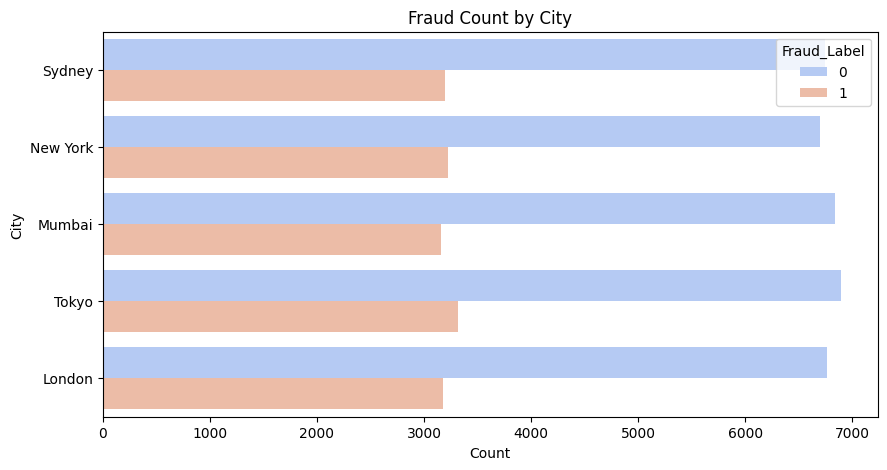

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Location'], hue=df['Fraud_Label'], palette='coolwarm')
plt.title("Fraud Count by City")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()

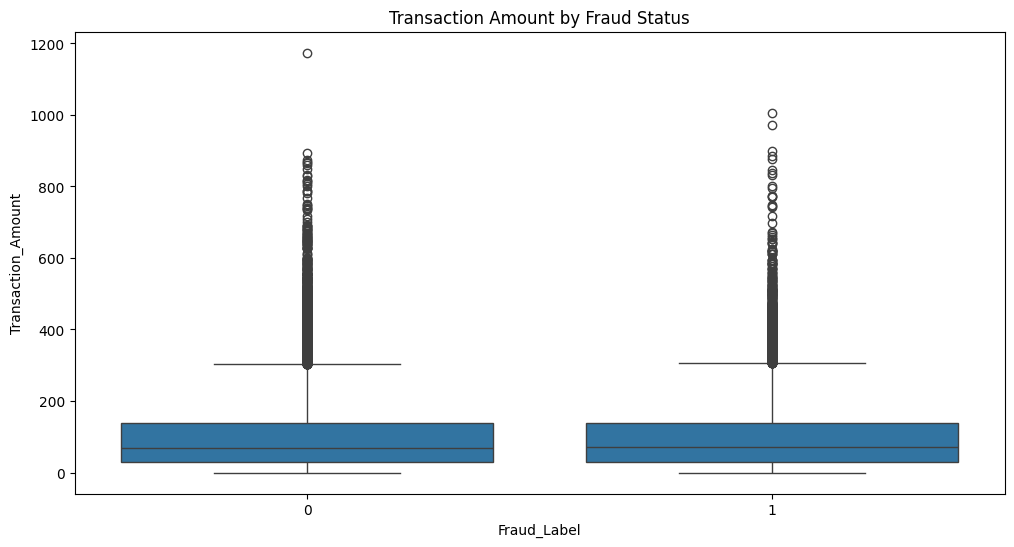

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fraud_Label', y='Transaction_Amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.show()

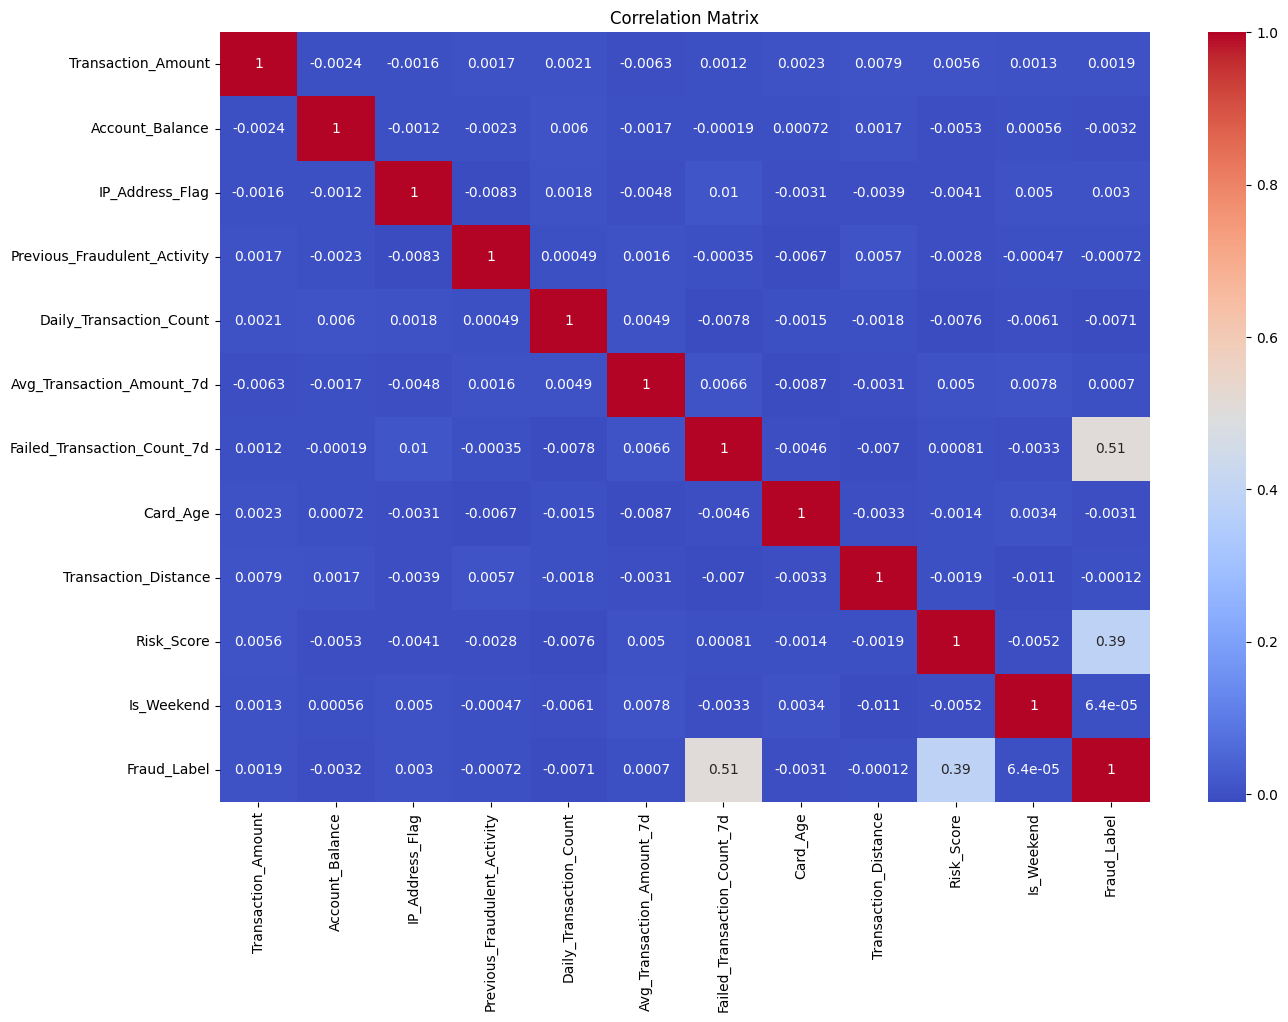

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
print(df['Fraud_Label'].value_counts(normalize=True))

Fraud_Label
0    0.67866
1    0.32134
Name: proportion, dtype: float64


### Profile Report

In [ ]:
profile = ProfileReport(df, title="Fraud Detection", explorative=True)
profile.to_notebook_iframe()

profile.to_file("../assets/Fraud_Detection_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:17<00:00,  1.22it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]